In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Mon, 20 Apr 2020 10:17


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,008,082","451,155,630","-16,852,452",-3.60%
HOV,"1,194,523","1,148,004","-46,519",-3.89%
Principal Arterial,"11,044,380","12,254,640","1,210,260",10.96%
Ramp,"352,596","284,484","-68,112",-19.32%
Total,"480,599,581","464,842,758","-15,756,823",-3.28%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","323,682,789","-14,463,092",-4.28%
Pierce,"76,929,900","76,955,112","25,212",0.03%
Snohomish,"65,523,800","64,204,857","-1,318,943",-2.01%
Total,"480,599,581","464,842,758","-15,756,823",-3.28%


----
### Scatterplots 

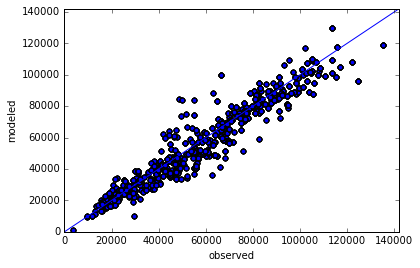

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.955560806839


---
By County

King r^2: 0.961211628547


Pierce r^2: 0.831384001283
Snohomish r^2: 0.985394584454


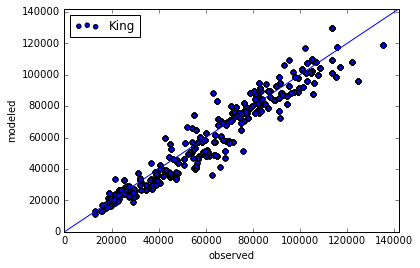

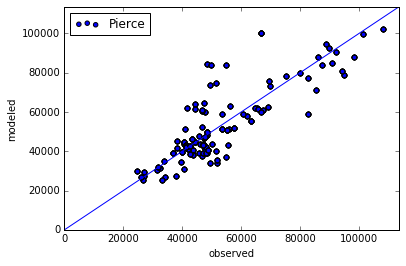

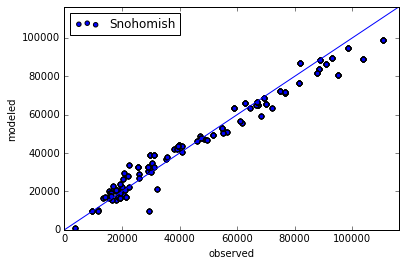

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.945810559003
r^2 Principal Arterial: 0.916851944376


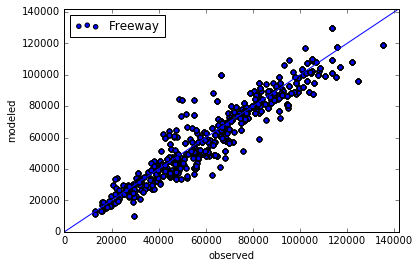

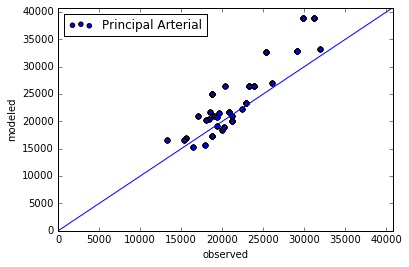

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","517,037","-51,380",-9.04%
1,KENT,"550,322","480,364","-69,958",-12.71%
2,SEATTLE - SOUTH OF CBD,"526,500","494,658","-31,842",-6.05%
3,SHIP CANAL,"519,802","526,396","6,594",1.27%
4,KIRKLAND-REDMOND,"414,120","376,868","-37,252",-9.00%
5,MILL CREEK,"400,848","382,721","-18,127",-4.52%
6,SOUTH BELLEVUE,"399,500","346,319","-53,181",-13.31%
7,SEATTLE - NORTH,"372,000","361,548","-10,452",-2.81%
8,TACOMA - EAST OF CBD,"312,164","315,294","3,130",1.00%
9,PARKLAND,"304,322","265,234","-39,088",-12.84%


r^2 : 0.992631358356


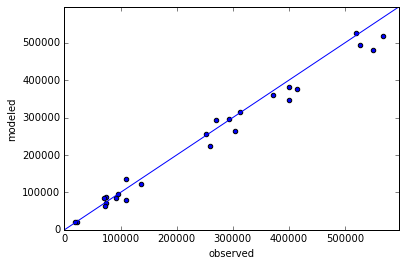

In [12]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","392,869",175,0.04%
5,Sound Transit,"145,426","146,803","1,378",0.95%
0,Community Transit,"30,918","30,502",-416,-1.35%
4,Pierce Transit,"27,233","38,002","10,769",39.54%
6,Washington Ferries,"16,912","12,247","-4,664",-27.58%
3,Kitsap Transit,"7,638","11,640","4,002",52.40%
1,Everett Transit,"3,290","2,772",-518,-15.74%


----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356","1,131",-225,-16.57%
1,POF Vashon Island -,670,55,-614,-91.77%
2,WSF Kingston - Edmon,"1,732",857,-875,-50.52%
3,WSF Bainbridge Islan,"8,857","7,258","-1,598",-18.05%
4,WSF Bremerton - Seat,"4,484","3,306","-1,179",-26.29%
5,WSF Fauntleroy - Sou,365,38,-328,-89.70%
6,WSF Vashon Island -,946,578,-368,-38.92%
7,WSF Southworth - Vas,239,186,-53,-22.08%
8,WSF Point Defiance -,289,25,-264,-91.35%


r^2 : 0.996217126083


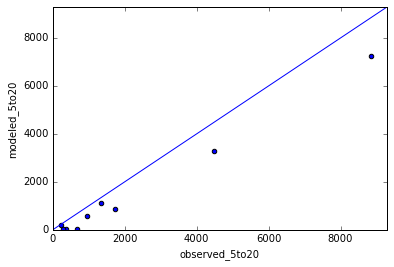

In [15]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","67,150","-2,233",-3.22%
1,Sounder South,"15,356","13,281","-2,075",-13.52%
2,Sounder North,"1,667","1,849",182,10.91%


r^2 : 0.99961640517


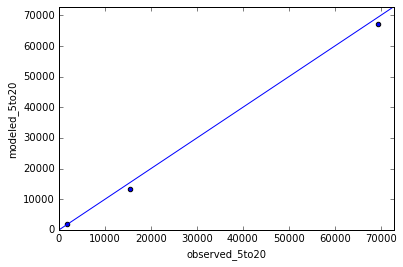

In [17]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,494",-842,-5.49%
1,KC Metro 40,"11,405","11,739",334,2.93%
5,D Line RapidRide,"13,078","11,251","-1,827",-13.97%
4,C Line RapidRide,"11,368","10,628",-740,-6.51%
10,Sound Transit 550,"9,168","10,602","1,434",15.64%
0,KC Metro 7,"10,150","9,757",-393,-3.87%
2,A Line RapidRide,"8,522","7,844",-678,-7.95%
7,F Line RapidRide,"5,267","7,104","1,837",34.88%
3,B Line RapidRide,"5,914","4,912","-1,002",-16.95%
9,First Hill Streetcar,"3,586","1,262","-2,324",-64.80%


r^2 : 0.958129780289


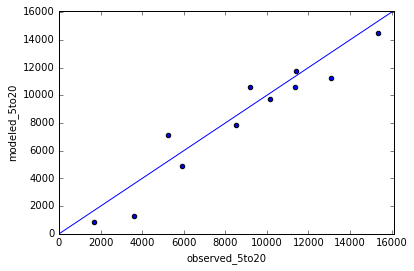

In [19]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.858708761194
r^2 Everett Transit: -0.356992200617
r^2 King County Metro: 0.942041465833
r^2 Kitsap Transit: 0.675651529972


r^2 Pierce Transit: 0.886774868021
r^2 Sound Transit: 0.99659014188
r^2 Washington Ferries: 0.997452969608


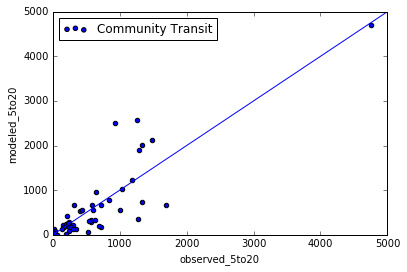

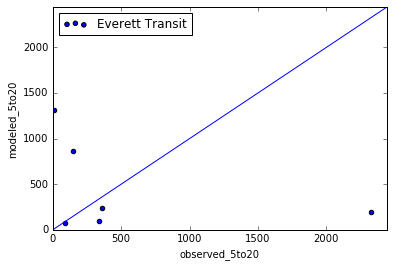

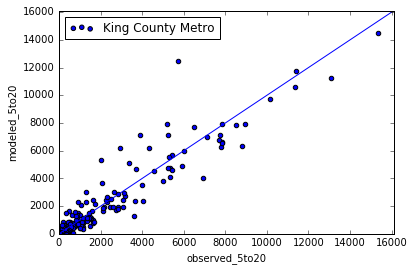

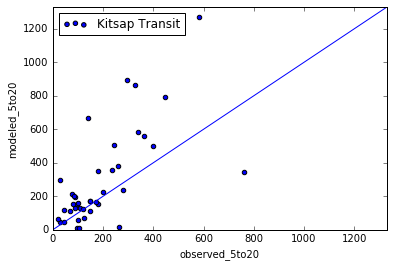

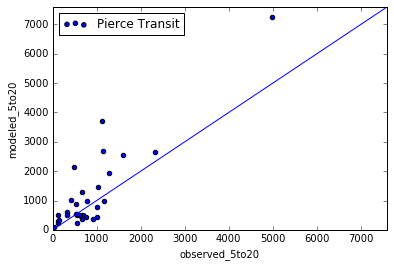

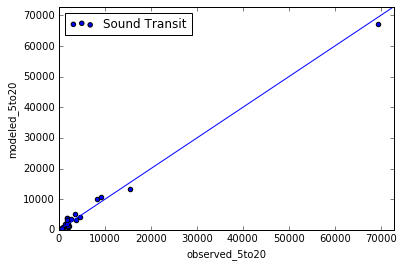

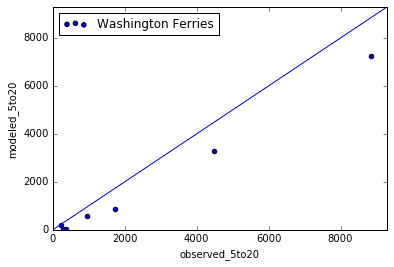

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","8,650",-766,-8.13%
Westlake,"10,904","7,880","-3,024",-27.73%
University St,"5,257","5,826",568,10.81%
Pioneer Square,"3,865","4,242",377,9.77%
Int'l District,"5,647","3,375","-2,273",-40.24%
Capitol Hill,"7,016","8,898","1,882",26.82%
Stadium,"1,912",658,"-1,255",-65.61%
SODO,"2,108","3,690","1,582",75.07%
Beacon Hill,"2,587","2,008",-580,-22.40%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","8,650",-766,-8.13%
Capitol Hill,"7,016","8,898","1,882",26.82%
Westlake/University St,"16,161","13,706","-2,455",-15.19%
Pioneer Square/Int'l District,"9,512","7,617","-1,895",-19.93%
Stadium/SODO,"4,020","4,347",327,8.14%
Beacon Hill/Mount Baker,"4,809","4,479",-331,-6.88%
Columbia City,"2,376","1,983",-393,-16.56%
Othello/Rainier Beach,"4,412","4,836",424,9.62%
Tukwila Int'l Blvd,"2,779","2,820",41,1.47%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.19,-99.00,99.19,-100.19%
Westlake,0.38,0.36,0.02,4.34%
University St,0.62,0.20,0.42,208.88%
Pioneer Square,0.56,0.16,0.40,251.02%
Int'l District,0.69,0.45,0.24,53.80%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.45,0.12,0.33,276.54%
SODO,0.43,0.31,0.11,36.26%
Beacon Hill,0.32,0.35,-0.03,-9.72%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","123,945","-6,055",-4.66%
I-5 to Mount Vernon,3744,"67,000","56,645","-10,355",-15.46%
I-90 @ Snoqualmie Pass,3739,"33,000","29,008","-3,992",-12.10%
SR-532 to Camano Island,3746,"23,000","19,985","-3,015",-13.11%
SR-507 to Yelm,3734,"23,000","19,469","-3,531",-15.35%
SR-3 to Belfair,3749,"18,000","16,053","-1,947",-10.82%
Hood Canal Bridge,3748,"18,000","16,130","-1,870",-10.39%
SR-530 N/O Stanwood,3745,"9,100","8,327",-773,-8.50%
Mukilteo-Clinton Ferry,3747,"6,300","5,899",-401,-6.36%


# Corridor Speed

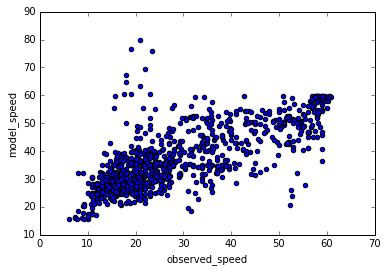

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [26]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,45,58
16,Everett to Seattle - SB,29,28
25,Tacoma to Seattle - NB,29,26
34,Seattle to Tacoma - SB,46,59
43,Bellevue to Lynnwood - NB,47,56
52,Lynnwood to Bellevue - SB,29,24
61,Tukwila to Bellevue - NB,28,19
70,Bellevue to Tukwila - SB,32,44
79,Auburn to Renton - NB,33,24
88,Renton to Auburn - SB,51,55


### PM Peak, Primary Corridors

In [27]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,31,24
11,Everett to Seattle - SB,41,28
20,Tacoma to Seattle - NB,43,42
29,Seattle to Tacoma - SB,33,27
38,Bellevue to Lynnwood - NB,32,24
47,Lynnwood to Bellevue - SB,43,41
56,Tukwila to Bellevue - NB,31,32
65,Bellevue to Tukwila - SB,28,20
74,Auburn to Renton - NB,51,44
83,Renton to Auburn - SB,35,32
